In [2]:
import pandas as pd
import numpy as np
from matrixprofile import *
from matrixprofile import distanceProfile
from matrixprofile.discords import discords
from matplotlib import pyplot as plt
import random
from scipy.io import arff

In [3]:
dataset = arff.loadarff('CBF/CBF_TRAIN.arff')
df = pd.DataFrame(dataset[0]) #30 record su matrice da 128 attributi + 'b': classe appartenenza
#print(df[['att1']]) #ACCESSO COLONNE
#print(df.iloc[0].values) #ACCESSO RIGHE PER INDICE INTERO
#print(df.loc["-0.842843"]) #ACCESSO RIGHE PER ATTRIBUTO (DATO ATTRIBUTO RESTITUISCE I CAMPI)
#print(df['att1'][0])
b = np.array(df.iloc[10].values)
c = np.array(df.iloc[27].values)
df.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att119,att120,att121,att122,att123,att124,att125,att126,att127,att128
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-0.817079,-0.882201,-0.844351,-0.976953,-1.076334,-1.057684,-0.939354,-0.868925,-0.986359,-0.934687,...,-0.769068,-0.583314,-0.490088,-0.562439,-0.673462,-0.646194,-0.607858,-0.678900,-0.801021,-0.729632
std,0.529125,0.466044,0.547590,0.440221,0.610145,0.456553,0.533715,0.440248,0.546810,0.463436,...,0.775207,0.764331,0.690728,0.683932,0.736295,0.670176,0.657181,0.690872,0.613758,0.483263
min,-1.945327,-1.839363,-1.844624,-1.914525,-2.313060,-1.899969,-2.154882,-1.653974,-2.265140,-1.800211,...,-1.848828,-1.946111,-1.611362,-1.534127,-1.852245,-1.576966,-1.742469,-1.941053,-2.111237,-1.768088
25%,-1.173821,-1.205991,-1.118274,-1.241626,-1.682533,-1.408781,-1.202432,-1.210433,-1.313459,-1.207153,...,-1.180316,-1.061934,-0.967960,-1.071869,-1.044709,-1.035455,-1.032168,-1.168407,-1.096079,-1.018777
50%,-0.764535,-0.890658,-0.829252,-1.032044,-0.984166,-1.105197,-1.027936,-0.954874,-0.946985,-0.956224,...,-0.930802,-0.673428,-0.632517,-0.718243,-0.860794,-0.784364,-0.794564,-0.673414,-0.936382,-0.728380
75%,-0.425967,-0.617240,-0.491672,-0.634343,-0.700697,-0.779065,-0.466412,-0.425824,-0.606959,-0.720763,...,-0.411472,-0.228579,-0.130998,-0.196304,-0.508221,-0.420463,-0.149227,-0.337305,-0.623986,-0.429875
max,0.045628,0.013128,0.342287,-0.038036,0.110781,-0.057289,-0.057041,-0.030007,0.002155,0.088190,...,2.039639,2.115751,1.498954,1.527989,1.688901,1.839214,0.984469,1.229552,0.839711,0.153169


In [4]:
""""
df = pd.DataFrame(dataset[0]) #TIPO: pandas.core.frame.DataFrame
print('df '+str(type(df)))

data = np.array(df.iloc[10].values) #TIPO: numpy.ndarray
print('data '+str(type(data)))

data=data[0:127]

dfMP = pd.DataFrame(data) #DATAFRAME INTERO, TIPO: pandas.core.frame.DataFrame
print(dfMP)
print('dfMP '+str(type(dfMP)))

print(dfMP[0])                  #TIPO: pandas.core.series.Series
print('dfMP[0] '+str(type(dfMP[0])))

#non cambia tra dfMP[0] e dfMP perche dfMP ha solo la colonna 0

print(dfMP[0].values) #TIPO: numpy.ndarray
print('dfMP[0].values '+str(type(dfMP[0].values)))

"""

'"\ndf = pd.DataFrame(dataset[0]) #TIPO: pandas.core.frame.DataFrame\nprint(\'df \'+str(type(df)))\n\ndata = np.array(df.iloc[10].values) #TIPO: numpy.ndarray\nprint(\'data \'+str(type(data)))\n\ndata=data[0:127]\n\ndfMP = pd.DataFrame(data) #DATAFRAME INTERO, TIPO: pandas.core.frame.DataFrame\nprint(dfMP)\nprint(\'dfMP \'+str(type(dfMP)))\n\nprint(dfMP[0])                  #TIPO: pandas.core.series.Series\nprint(\'dfMP[0] \'+str(type(dfMP[0])))\n\n#non cambia tra dfMP[0] e dfMP perche dfMP ha solo la colonna 0\n\nprint(dfMP[0].values) #TIPO: numpy.ndarray\nprint(\'dfMP[0].values \'+str(type(dfMP[0].values)))\n\n'

In [5]:
#TRICK

#for i, j in df.iterrows():
  #  print(i, j)
   # print()
    
"""    
columns = list(df)
l=list()
for i in columns:
    #print(i)
    # printing the third element of the column
    l.append(df[i][0])
print(l)
"""

'    \ncolumns = list(df)\nl=list()\nfor i in columns:\n    #print(i)\n    # printing the third element of the column\n    l.append(df[i][0])\nprint(l)\n'

In [6]:
#df = pd.DataFrame(data[0])
data = np.array(df.iloc[10].values)
data=data[0:127]
window_size=5

dfMP = pd.DataFrame(data).astype(float) #DA CAPIRE PERCHE SERVE FLOAT

mp, mpi = matrixProfile.stomp(dfMP[0].values,window_size) #OK

#PREPARO TUPLA DA PASSARE ALLA FUN MOTIF (VUOLE TUPLA FATTA DA MP E MPI)
tupla=mp,mpi

mot ,motif_dist  =motifs.motifs(dfMP[0].values,tupla,2)

#print(mp)
print(mot,motif_dist)

#CALCOLO DISCORDS
dis= discords(mp,window_size,3)
print(dis)


[[11, 26], [17, 75]] [0.16609611055262594, 0.2890055978564533]
[80 23 65]


In [7]:
def plot_motifs(mtfs, labels, ax):

    colori = 0
    colors = 'rmb'
    for ms,l in zip(mtfs,labels):
        c =colors[colori % len(colors)]
        starts = list(ms)
        ends = [min(s + window_size,len(data)-1) for s in starts]
        ax.plot(starts, data[starts],  c +'o',  label=l+'(Motif)')
        ax.plot(ends, data[ends],  c +'o', markerfacecolor='none')
        for nn in ms:
            ax.plot(range(nn,nn+window_size),data[nn:nn+window_size], c , linewidth=2)
        colori += 1

    #ax.plot(a,'green', linewidth=1, label="data") COMMENTATO PERCHE PLOTTO I DATI INDIPENDENTEMENTE
    ax.legend()

In [8]:
def plot_discords(dis,ax):
    
    
    color = 'k'
    for start in dis:
        end=start+window_size
        ax.plot(start, data[start],  color ,label='Discord')
        ax.plot(end, data[end],  color , markerfacecolor='none')
        
        ax.plot(range(start,start+window_size),data[start:start+window_size], color , linewidth=2)
        
    ax.legend(loc=1, prop={'size':15})    

In [9]:
def plot_motifs_MP(mtfs, labels, ax):

    colori = 0
    colors = 'rmb'
    for ms,l in zip(mtfs,labels):
        c =colors[colori % len(colors)]
        starts = list(ms)
        ends = [min(s + window_size,len(mp)-1) for s in starts]
        ax.plot(starts, mp[starts],  c +'o',  label=l+'(Motif)')
        ax.plot(ends, mp[ends],  c +'o', markerfacecolor='none')
        for nn in ms:
            ax.plot(range(nn,nn+window_size),mp[nn:nn+window_size], c , linewidth=2)
        colori += 1

    #ax.plot(a,'green', linewidth=1, label="data") COMMENTATO PERCHE PLOTTO I DATI INDIPENDENTEMENTE
    ax.legend()

In [10]:
def plot_discords_MP(dis,ax):
    
    
    color = 'k'
    for start in dis:
        end=start+window_size
        ax.plot(start, mp[start],  color ,label='Discord')
        ax.plot(end, mp[end],  color , markerfacecolor='none')
        
        ax.plot(range(start,start+window_size),mp[start:start+window_size], color , linewidth=2)
        
    ax.legend(loc=1, prop={'size':15}) 

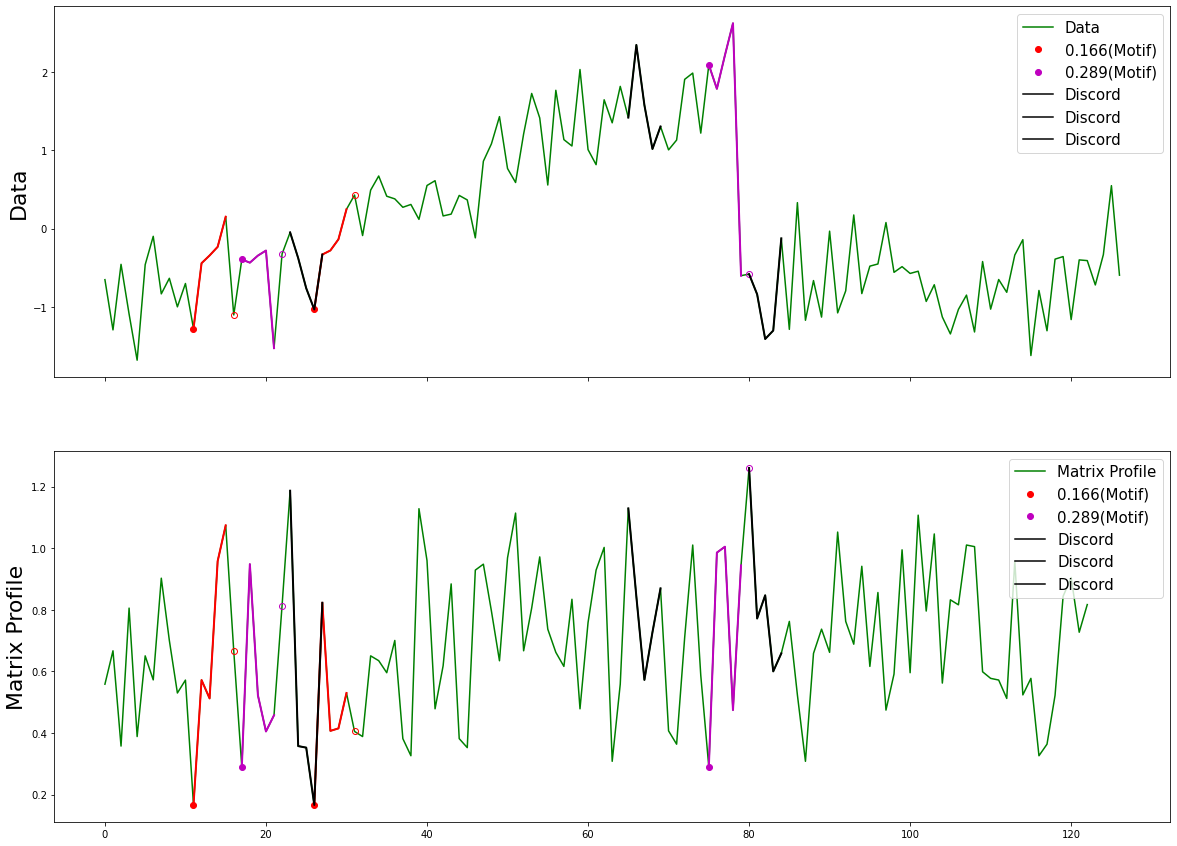

In [11]:
#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp,np.zeros(window_size-1)+np.nan)

#MODO 2 PER PLOTTARE (O-ORIENTED)
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,15))
ax1.plot(np.arange(len(data)),data, label="Data", color='g') #stampo linespace su x e valori data su y (USATO SE NON STAMPO MOTIF/DIS)
ax1.set_ylabel('Data', size=22)
plot_motifs(mot, [f"{md:.3f}" for md in motif_dist], ax1)
plot_discords(dis, ax1)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj)),mp_adj,label="Matrix Profile", color='green')
ax2.set_ylabel('Matrix Profile', size=22)
plot_motifs_MP(mot, [f"{md:.3f}" for md in motif_dist], ax2)
plot_discords_MP(dis, ax2)

plt.show()

In [12]:
#UNDERSTAING DISTANCE PROFILE

In [13]:
#se minV è in pos x dentro DP, allora si riferisce alla seq in pos x,x+1 in Ts
def getMinSubseq(Dp,Ts1,lenSubseq): #cerca val minimo in DistProf e restituisce la subseq di Ts1 con dist minore da 
                                    #quella usata per calcolare DProfile(), contenuta in Ts1
    minV=500
    idx=-1
    for i in range(10):
        if (Dp[i]<minV):
            minV=Dp[i]
            idx=i
    print(idx)
    return Ts1[idx],Ts1[idx+1]
    

In [14]:
Ts1 = np.array(df.iloc[10].values)
Ts1=Ts1[0:11]
Dp=distanceProfile.massDistanceProfile(Ts1,0,2) #calcola vettore di distanze minime ottenuto con zDistEucli tra Ts1 e subseq[0:2]
print(Dp[0])


[           inf            inf 6.32202728e-08 0.00000000e+00
 2.82842712e+00 2.82842712e+00 0.00000000e+00 2.82842712e+00
 6.66400187e-08 2.82842712e+00]


In [15]:
dataframe=pd.DataFrame()
Dp_adj=np.append(Dp[0],np.zeros(len(Ts1)-len(Dp[0])))
dataframe['DP']=Dp_adj
dataframe['Ts']=Ts1

print(dataframe)
print(dataframe.iloc[0])

              DP         Ts
0            inf  -0.653308
1            inf   -1.29518
2   6.322027e-08  -0.457384
3   0.000000e+00   -1.09204
4   2.828427e+00   -1.68235
5   2.828427e+00  -0.461811
6   0.000000e+00 -0.0993624
7   2.828427e+00  -0.834809
8   6.664002e-08  -0.635881
9   2.828427e+00   -1.00058
10  0.000000e+00  -0.702287
DP         inf
Ts   -0.653308
Name: 0, dtype: object


In [96]:
print(getMinSubseq(Dp_adj,Ts1,2))

3
(-1.0920364, -1.6823461)


In [103]:
for i in range(9):
    zDist=utils.zNormalizeEuclidian(Ts1[0:2],Ts1[i:i+2])
    print(zDist)
#verifico che la subseq [3,4] si effettivamente la piu vicina a [0,1] --> lo è avendo valore minore => Mass funziona :)

0.0
2.82842712474619
3.1401849173675503e-16
2.482534153247273e-16
2.82842712474619
2.82842712474619
4.965068306494546e-16
2.8284271247461903
7.108895957933346e-16
